## KNN Approach



### Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

from pathlib import Path
import os

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


from pyMLaux import plot_history, evaluate_classification_result,plot_2d_prediction


2024-04-20 12:15:43.896889: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 12:15:43.896973: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 12:15:43.898528: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-20 12:15:43.908696: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 12:15:45.984374: W tensorflow/compiler/tf2

In [2]:
# read dynamic path
base_dir = Path(os.getcwd()).parents[3]
data_dir = base_dir / "data/source/"
result_dir = base_dir / "data/results/"

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [3]:
nn_data_raw = pd.read_csv(data_dir/"DPP4/DPP4.csv")

nn_data_raw

,INDEX,NAME,Pi-Cation_Interaction:HIS740A,Halogen_Bond:ASP709A,Halogen_Bond:VAL546A,Hydrogen_Bond:GLY741A,Water_Bridge:GLU204A,Water_Bridge:ARG125A,Halogen_Bond:ARG358A,Hydrophobic_Interaction:ALA743A,...,Hydrogen_Bond:ARG669A,Hydrogen_Bond:ASN710A,Hydrogen_Bond:GLU204A,Hydrophobic_Interaction:ARG125A,Halogen_Bond:SER630A,Water_Bridge:ASP739A,Salt_Bridge:ARG358A,Water_Bridge:GLU205A,Hydrophobic_Interaction:ASP739A,LABEL
0,1,CHEMBL386369|actives_final|sdf|444,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,active
1,2,ZINC38935877|decoys_final|sdf|121,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,inactive
2,3,ZINC63159848|decoys_final|sdf|138,0,0,0,0,0,3,0,0,...,0,1,0,0,0,0,0,0,0,inactive
3,4,ZINC23079060|decoys_final|sdf|264,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,inactive
4,5,CHEMBL290337|actives_final|sdf|331,0,0,0,0,0,3,0,0,...,1,1,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,1691,ZINC49729498|decoys_final|sdf|645,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1691,1692,ZINC43263233|decoys_final|sdf|584,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1692,1693,ZINC36962060|decoys_final|sdf|615,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1693,1694,CHEMBL564854|actives_final|sdf|55,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,active


In [4]:
lookup = {'inactive':0,'active':1}

nn_data = {'data': np.array(nn_data_raw.iloc[:, 2:-1]),
             'target': np.array([lookup[y] for y in nn_data_raw.iloc[0:,-1]]),
             'feature_names': nn_data_raw.columns[2:-1],
             'target_names': ['inactive', 'active']}


split into train- and test-set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(nn_data['data'], nn_data['target'],
                                                    test_size=0.3, random_state=4232)



### train and apply neural network

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data['data'].shape[1], )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

2024-04-20 12:15:48.438136: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 121       


2024-04-20 12:15:48.496092: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 12:15:48.496285: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 12:15:48.499153: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 12:15:48.499450: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 12:15:48.499617: I external/local_xla/xla/stream_executor

                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/150


2024-04-20 12:15:51.923058: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-20 12:15:52.952178: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f34b83a4770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-20 12:15:52.952722: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-04-20 12:15:52.973012: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-20 12:15:53.021146: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1713608153.206321   51661 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


60/60 - 4s - loss: 0.7225 - accuracy: 0.4568 - val_loss: 0.7004 - val_accuracy: 0.5294 - 4s/epoch - 66ms/step
Epoch 2/150
60/60 - 1s - loss: 0.7062 - accuracy: 0.5000 - val_loss: 0.6882 - val_accuracy: 0.5588 - 716ms/epoch - 12ms/step
Epoch 3/150
60/60 - 1s - loss: 0.6935 - accuracy: 0.5327 - val_loss: 0.6766 - val_accuracy: 0.6176 - 619ms/epoch - 10ms/step
Epoch 4/150
60/60 - 1s - loss: 0.6818 - accuracy: 0.5812 - val_loss: 0.6669 - val_accuracy: 0.6597 - 650ms/epoch - 11ms/step
Epoch 5/150
60/60 - 1s - loss: 0.6712 - accuracy: 0.6013 - val_loss: 0.6578 - val_accuracy: 0.6807 - 695ms/epoch - 12ms/step
Epoch 6/150
60/60 - 1s - loss: 0.6617 - accuracy: 0.6245 - val_loss: 0.6493 - val_accuracy: 0.6933 - 697ms/epoch - 12ms/step
Epoch 7/150
60/60 - 1s - loss: 0.6522 - accuracy: 0.6392 - val_loss: 0.6404 - val_accuracy: 0.7101 - 706ms/epoch - 12ms/step
Epoch 8/150
60/60 - 1s - loss: 0.6443 - accuracy: 0.6456 - val_loss: 0.6351 - val_accuracy: 0.7227 - 701ms/epoch - 12ms/step
Epoch 9/150
60/

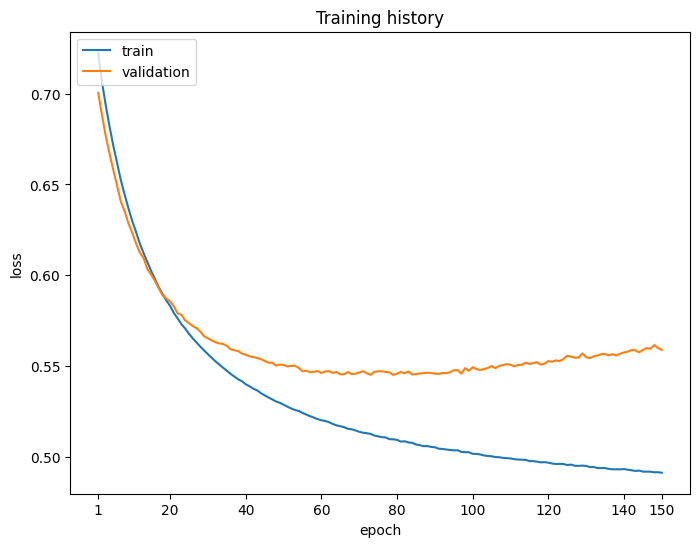

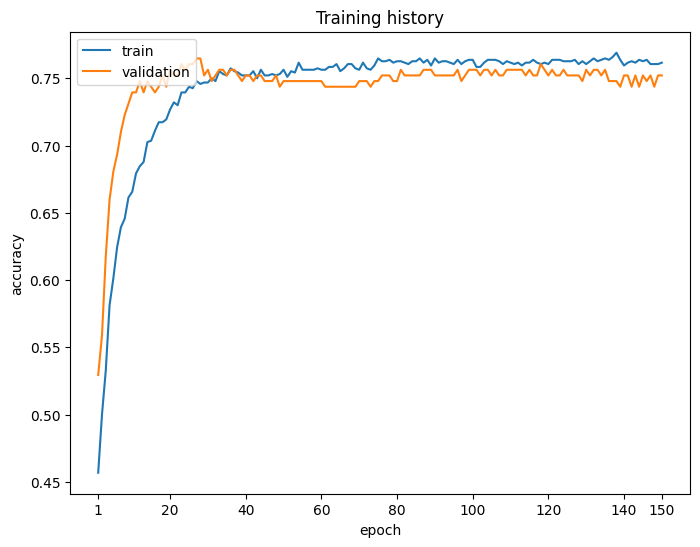

In [7]:
history = model.fit(x=X_train, y=y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

### Evaluate Testdata using model

In [8]:
pred = model.predict(X_test)
classes= [1 if i > 0.5  else 0 for i in pred]


16/16 [==============================] - 1s 18ms/step


### Prepare Data for evaluation

In [9]:
result_df = pd.DataFrame(columns=nn_data_raw.columns[:-1])
result_df = result_df.drop(columns="NAME")

for i, row in enumerate(X_test):
    data = [i]
    data.extend(row)
    result_df.loc[len(result_df["INDEX"])] = data

result_df["LABEL"] = y_test
result_df["PRED"] = classes

result_df.to_csv(result_dir / "DPP4/baseline_nn.csv", encoding="utf-8")